# Auditory Demonstrations

Based on:    [**Auditory Demonstrations**](https://research.tue.nl/en/publications/auditory-demonstrations), *A.J.M. Houtsma, Th.D. Rossing, W.M. Wagemakers*, Technische Universiteit Eindhoven, Institute for Perception Research, 1987.    
Booklet with [detailed documentation](https://pure.tue.nl/ws/portalfiles/portal/79033010/402660.pdf)


In [1]:
%matplotlib inline
import os,sys,io 
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML

import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

import librosa as librosa
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
try:
  import soundfile as sf
except:
  ! pip -q install soundfile
  import soundfile as sf
    
from pyspch import spectrogram as specg
from pyspch import audio
import pyspch.display as spch_disp

In [30]:
# time based selection of mono wave data (no error checking)
def wav_select(data,t0=None,t1=None,sample_rate=16000):
    if t0 is None: i0 = 0
    else: i0 = int(t0*sample_rate)
    if t1 is None: i1 = len(data)
    else: i1 = int(t1*sample_rate)
    return(data[i0:i1])

def make_demo(demo):
    wavdata, sample_rate = audio.load(root+demo['filename'],sample_rate=16000,mono=True)
    instr_data = wav_select(wavdata,None,demo['instructions'][1])
    demo_data = wav_select(wavdata,demo['demo'][0],None)
    demo_spg = specg.spectrogram(demo_data,sample_rate=sample_rate)
    if('text' in demo):
            display(demo['text'])
    else:
            display("Instructions")
            display(Audio(data=instr_data,rate=sample_rate,autoplay=False))
    display(Audio(data=demo_data,rate=sample_rate,autoplay=False))
    display(spch_disp.plot_spg(demo_spg,wav=demo_data,sample_rate=sample_rate))
#
root = 'http://homes.esat.kuleuven.be/~compi/demos/AuditoryDemonstrations/'

wav2c = 'TrackNo56.wav'
demo1 = {'filename':'TrackNo08.wav','instructions':[None,12.],'demo':[12.,None]}
demo2a = {'filename':'TrackNo54.wav','instructions':[None,10.],'demo':[10.,48.],
         'text':"You will hear a recording of a Bach chorale played on a piano"}
demo2b = {'filename':'TrackNo55.wav','instructions':[None,4.],'demo':[4.,42.],
         'text':"Now the same chorale will be played backwards"}
demo2c = {'filename':'TrackNo56.wav','instructions':[None,9.],'demo':[9.,37.],
         'text':"Finally the tape of the last recording is played backwards so that the chorale is heard forward again, but with an interesting difference"}

### DEMONSTRATION 1: The Decibel Scale

Broadband noise is reduced in 10 steps of 6 decibels. Demonstrations are repeated once."  (Track No08)

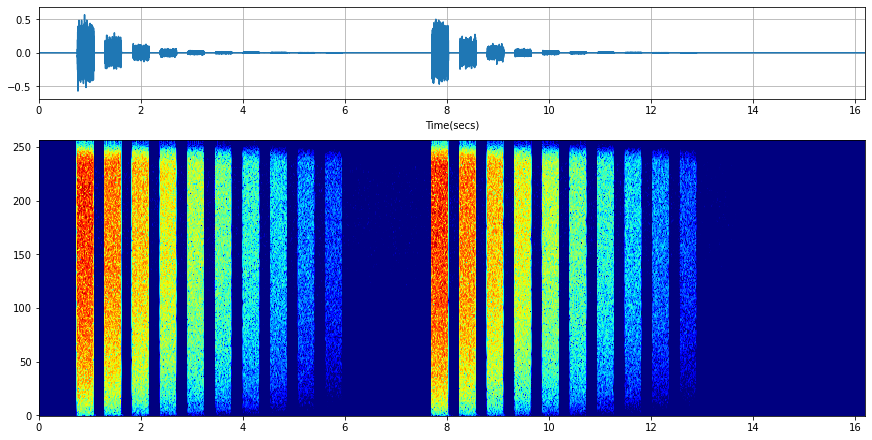

In [29]:
make_demo(demo1)

### DEMONSTRATION 2: The Effect of Tone Envelope on Timbre

- "You will hear a recording of a Bach chorale played on a piano" (Track No54)
- "Now the same chorale will be played backwards" (Track No55)
- "Finally the tape of the last recording is played backwards so that the chorale is heard forward again, but with an interesting difference". (Track No 56)

'You will hear a recording of a Bach chorale played on a piano'

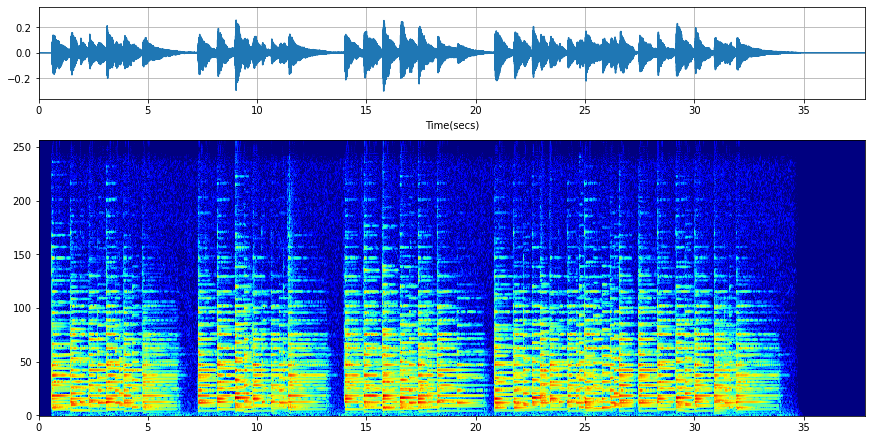

In [31]:
make_demo(demo2a)

'Now the same chorale will be played backwards'

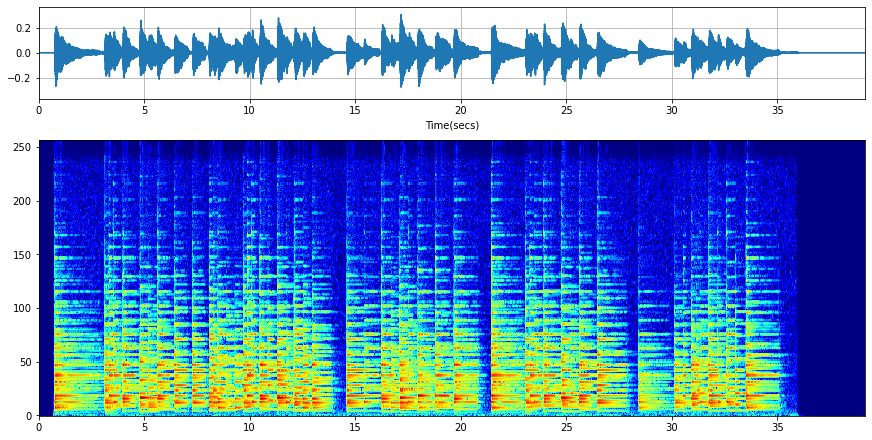

In [32]:
make_demo(demo2b)

'Finally the tape of the last recording is played backwards so that the chorale is heard forward again, but with an interesting difference'

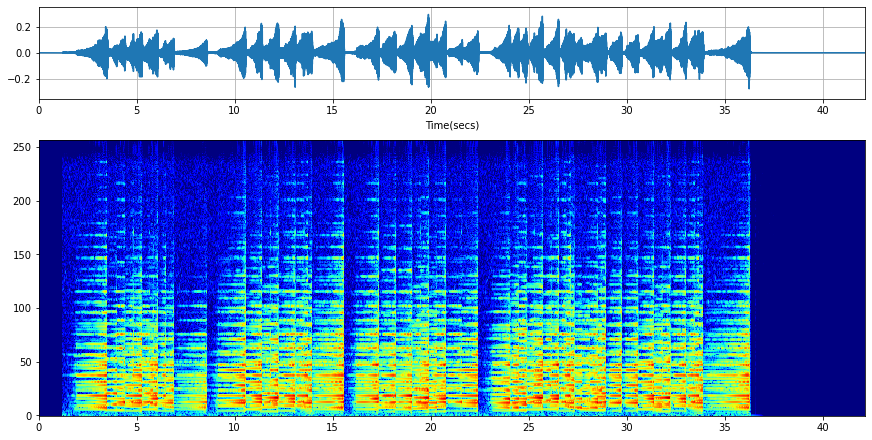

In [33]:
make_demo(demo2c)